In [1]:
import numpy as np 
import pandas as pd
import yfinance as yf
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG'

data = yf.download(ticker,start ='2007-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [3]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

Date
2023-10-24    0.011743
2023-10-25    0.004659
2023-10-26   -0.005326
2023-10-27   -0.017781
2023-10-30    0.006502
Name: Adj Close, dtype: float64

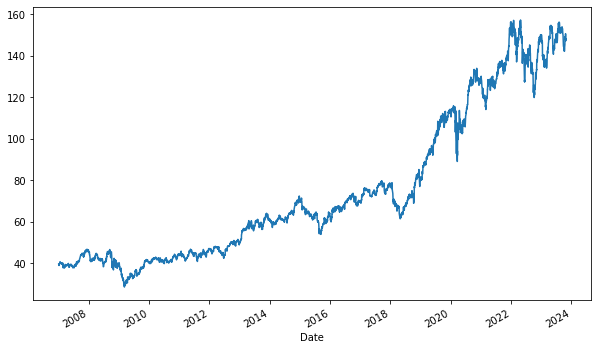

In [5]:
data.plot(figsize= (10,6));

<AxesSubplot:xlabel='Date'>

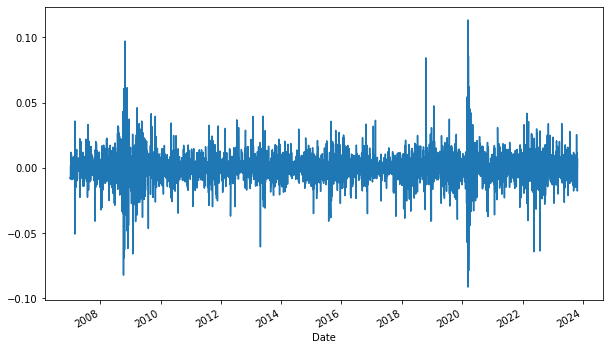

In [6]:
log_returns.plot(figsize=(10,6))

In [7]:
u = log_returns.mean()
u

0.0003116305115875929

In [8]:
var = log_returns.var()
var

0.00013788257204430863

# drift = u - 0.5*var

In [9]:
drift = u - (0.5 * var)
drift

0.0002426892255654386

In [10]:
stdev = log_returns.std()
stdev

0.011742340995061787

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10,2,)
x

array([[0.66797258, 0.08758468],
       [0.51362129, 0.9594817 ],
       [0.67757877, 0.36115027],
       [0.46041578, 0.02266698],
       [0.819472  , 0.46706364],
       [0.5154661 , 0.34608251],
       [0.28006377, 0.06315513],
       [0.43822743, 0.16378605],
       [0.36477391, 0.67698015],
       [0.5201625 , 0.94404208]])

In [19]:
norm.ppf(x)

array([[ 0.43432172, -1.3557794 ],
       [ 0.03415016,  1.74470289],
       [ 0.46093888, -0.35538585],
       [-0.09938631, -2.00154241],
       [ 0.91335476, -0.08265323],
       [ 0.03877749, -0.39591869],
       [-0.58265207, -1.52881524],
       [-0.15546487, -0.97901595],
       [-0.34572711,  0.45927081],
       [ 0.05056144,  1.58964062]])

In [20]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-1.17768487, -0.02473144],
       [-1.22140829,  0.05627083],
       [-0.26674023, -0.5117851 ],
       [-1.01484544, -0.84944465],
       [ 0.13259002, -0.02299003],
       [-1.39073288, -0.12389225],
       [ 1.27571902, -1.4423859 ],
       [ 1.83509324, -1.06627345],
       [ 0.17196705,  0.49109086],
       [ 1.35510139, -1.75187919]])

In [21]:
t_intervals = 1000
iterations = 10

# daily_returns = e^r

# r = drift + stdev*z

In [27]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) *norm.ppf(np.random.rand(t_intervals, iterations)))

In [28]:
daily_returns

array([[1.01239013, 1.01249211, 0.9968576 , ..., 1.01627691, 0.99679666,
        1.00630014],
       [0.99688578, 1.00636036, 0.97570238, ..., 1.00892686, 0.98811127,
        1.00564247],
       [0.98481523, 0.98850994, 0.99542368, ..., 1.01048132, 0.98127628,
        0.99502292],
       ...,
       [1.0016435 , 0.99937223, 0.98824069, ..., 1.00018216, 1.01230197,
        1.00447173],
       [0.99944366, 1.00142831, 0.99123952, ..., 1.01259407, 1.0225793 ,
        1.01294515],
       [1.01369839, 0.99453868, 0.99489356, ..., 1.01652652, 0.98380257,
        1.00684097]])

# create a price list

In [29]:
S0 = data.iloc[-1]
S0

148.1199951171875

In [30]:
price_list = np.zeros_like(daily_returns)

In [31]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
price_list[0] = S0

In [34]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [35]:
price_list

array([[148.11999512, 148.11999512, 148.11999512, ..., 148.11999512,
        148.11999512, 148.11999512],
       [147.65871671, 149.06209094, 144.52103114, ..., 149.44224109,
        146.35903715, 148.95575783],
       [145.41655373, 147.34935898, 143.859657  , ..., 151.00859287,
        143.61865124, 148.2143929 ],
       ...,
       [247.222834  , 167.76453367, 167.28024682, ..., 137.39439213,
        155.32020651, 201.86605041],
       [247.08529517, 168.00415396, 165.81479181, ..., 139.12474628,
        158.82722876, 204.47923706],
       [250.46996506, 167.08663024, 164.96806836, ..., 141.42399447,
        156.25463655, 205.8780724 ]])

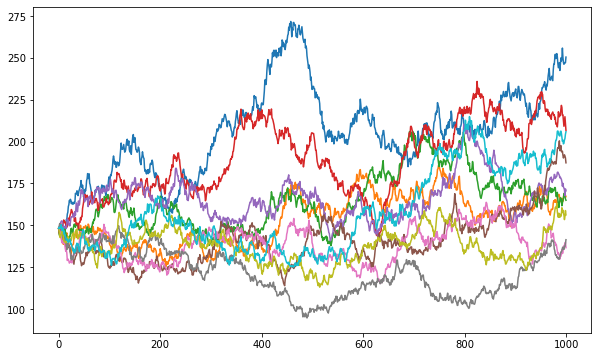

In [36]:
plt.figure(figsize=(10,6))
plt.plot(price_list);